In [1]:
import pandas as pd
import math as m
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

Считываем данные.

In [2]:
data, columns, experiments = ll.read_standard_layout()

Сначала обработаем калибровочный эксперимент. Вычислим напряжённость магнитного поля для каждого значения тока через соленоид (измерено милливеберметром): $B = \frac{\Phi - \Phi_0}{SN}$.

In [3]:
e = "e1_calib"

ll.compute(name = "B",
           expr = lambda Phi_1, Phi_0, SN: (Phi_1 - Phi_0) / SN,
           data = data[e],
           columns = columns[e])

disp(data[e], columns[e])

,Value,Error,ErrorRel
SN,0.300000,0.000500,0.17%


,I,Error_I,ErrorRel_I,Phi_1,Error_Phi_1,ErrorRel_Phi_1,Phi_0,Error_Phi_0,ErrorRel_Phi_0,B,Error_B,ErrorRel_B
0,-3.480000,0.005000,-0.14%,0.000000,0.000050,inf%,0.004700,0.000050,1.06%,-0.015667,0.000237,-1.51%
1,-2.770000,0.005000,-0.18%,0.001000,0.000050,5.00%,0.004800,0.000050,1.04%,-0.012667,0.000237,-1.87%
2,-2.030000,0.005000,-0.25%,0.002000,0.000050,2.50%,0.004800,0.000050,1.04%,-0.009333,0.000236,-2.53%
3,-1.320000,0.005000,-0.38%,0.003000,0.000050,1.67%,0.004800,0.000050,1.04%,-0.006000,0.000236,-3.93%
4,-0.670000,0.005000,-0.75%,0.004000,0.000050,1.25%,0.004900,0.000050,1.02%,-0.003000,0.000236,-7.86%
5,0.660000,0.005000,0.76%,0.001000,0.000050,5.00%,0.000100,0.000050,50.00%,0.003000,0.000236,7.86%
6,1.390000,0.005000,0.36%,0.002000,0.000050,2.50%,0.000100,0.000050,50.00%,0.006333,0.000236,3.73%
7,2.130000,0.005000,0.23%,0.003000,0.000050,1.67%,0.000100,0.000050,50.00%,0.009667,0.000236,2.44%
8,2.870000,0.005000,0.17%,0.004500,0.000050,1.11%,0.000600,0.000050,8.33%,0.013000,0.000237,1.82%
9,3.710000,0.005000,0.13%,0.005700,0.000050,0.88%,0.000700,0.000050,7.14%,0.016667,0.000237,1.42%


Теперь построим график $B = f(I)$ и приблизим его прямой, получая модель $B(I)$ (т. е. $\frac{dB}{dI}$ и значение $B(0)$).

Initial guesses for B = f(I):
           Value    Error  ErrorRel
_dB_dI  0.004527 0.000032  0.007054
_B_0   -0.000022 0.000075 -3.436114

Final guesses for B = f(I):


,Value,Error,ErrorRel
_dB_dI,0.004527,0.000012,0.26%
_B_0,-0.000022,0.000027,-125.95%


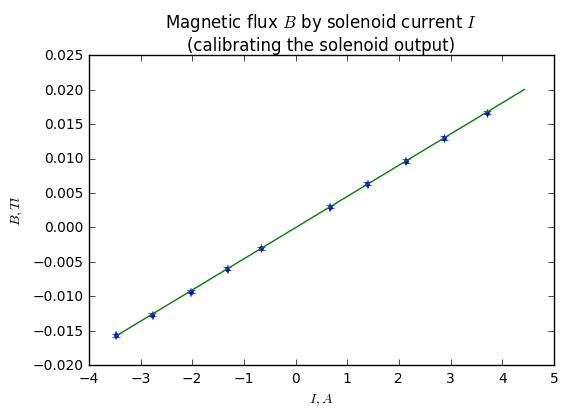

In [4]:
ll.plotfit(title = "Magnetic flux $B$ by solenoid current $I$\n(calibrating the solenoid output)",
           xlabel = "$I, A$",
           ylabel = "$B, Tl$",
           model = lambda I, _dB_dI, _B_0: I * _dB_dI + _B_0,
           x = "I",
           y = "B",
           data = data[e],
           columns = columns[e])
None

Теперь основной эксперимент. Пользуясь найденной ранее моделью $B(I)$, вычислим значения напряжённости магнитного поля в соленоиде $B_f$ для каждого значения тока, при котором наблюдалась фокусировка электронов.

In [5]:
e = "e1_run"

ll.add(data[e], data["e1_calib"].loc[["_B_0", "_dB_dI"]])

ll.compute(name = "B",
           expr = lambda I, _dB_dI, _B_0: I * _dB_dI + _B_0,
           data = data[e],
           columns = columns[e])

disp(data[e], columns[e])

,Value,Error,ErrorRel
L,0.265000,0.000500,0.19%
V,850.000000,100.000000,11.76%
_B_0,-0.000022,0.000027,-125.95%
_dB_dI,0.004527,0.000012,0.26%


,I,Error_I,ErrorRel_I,n,Error_n,ErrorRel_n,B,Error_B,ErrorRel_B
0,-2.760000,0.005000,-0.18%,-5,0,-0.00%,-0.012518,0.000048,-0.38%
1,-2.230000,0.005000,-0.22%,-4,0,-0.00%,-0.010118,0.000044,-0.44%
2,-1.680000,0.005000,-0.30%,-3,0,-0.00%,-0.007628,0.000041,-0.53%
3,-1.090000,0.005000,-0.46%,-2,0,-0.00%,-0.004957,0.000038,-0.76%
4,-0.540000,0.005000,-0.93%,-1,0,-0.00%,-0.002467,0.000036,-1.46%
5,0.350000,0.005000,1.43%,1,0,0.00%,0.001563,0.000036,2.29%
6,1.110000,0.005000,0.45%,2,0,0.00%,0.005004,0.000038,0.76%
7,1.670000,0.005000,0.30%,3,0,0.00%,0.007539,0.000041,0.54%
8,2.200000,0.005000,0.23%,4,0,0.00%,0.009939,0.000044,0.44%
9,2.710000,0.005000,0.18%,5,0,0.00%,0.012248,0.000048,0.39%


Наконец, построим график зависимости напряжённости $B_f$ от номера точки фокуса и получим коэффициент $\frac{dB}{dn}$.

Initial guesses for B = f(n):
          Value    Error  ErrorRel
_dB_dn 0.002484 0.000004  0.001695

Final guesses for B = f(n):


,Value,Error,ErrorRel
_dB_dn,0.002490,0.000031,1.25%


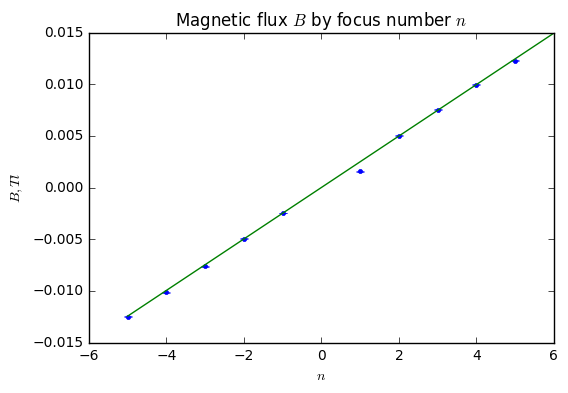

In [6]:
ll.plotfit(title = "Magnetic flux $B$ by focus number $n$",
           xlabel = "$n$",
           ylabel = "$B, Tl$",
           model = lambda n, _dB_dn: n * _dB_dn,
           x = "n", xerr = None,
           y = "B",
           columns = columns[e],
           data = data[e])
None

Наконец, рассчитаем удельный заряд электрона: $\frac{e}{m} = \frac{8 \pi^2 V}{L^2} (\frac{dn}{dB})^2$.

Он равен $\frac{e}{m} = (1.54 \pm 0.19) * 10^{11} \frac{Кл}{кг}$. Погрешность результата — $12\%$.

In [7]:
ll.compute(name = "_e_m",
           expr = lambda V, L, _dB_dn: 8 * (V * m.pi**2 / L**2) * (1/_dB_dn)**2,
           data = data[e],
           columns = columns[e],
           debug = 1)
None

Computing variable _e_m
Error influence estimations:


,Error,Derivative,(E*D)^2
V,100.000000,181354080.727852,3.28893025966442e+20
_dB_dn,0.000031,-123820036454844.,1.49175543980920e+19
L,0.000500,-1163403536744.71,3.38376947327525e+17


Result:


,Value,Error,ErrorRel
_e_m,154150968618.674072,18551252176.385872,12.03%
